In [1]:
import numpy as np
from skimage import io as io_url
import matplotlib.pyplot as plt
import cv2


In [2]:
def DFT_slow(data):
    """
    Implement the discrete Fourier Transform for a 1D signal
    params:
      data: Nx1: (N, ): 1D numpy array
    returns:
      DFT: Nx1: 1D numpy array
    """
    N = len(data)
    DFT = np.zeros(N, dtype=np.complex128)

    for k in range(N):
        for n in range(N):
            DFT[k] += data[n] * np.exp(-2j * np.pi * k * n / N)

    return DFT

In [4]:
def show_img(origin, row_fft, row_col_fft):
    """
    Show the original image, row-wise FFT and column-wise FFT

    params:
        origin: (H, W): 2D numpy array
        row_fft: (H, W): 2D numpy array
        row_col_fft: (H, W): 2D numpy array
    """
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
    axs[0].imshow(origin, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(np.log(np.abs(np.fft.fftshift(row_fft))), cmap='gray')
    axs[1].set_title('Row-wise FFT')
    axs[1].axis('off')
    axs[2].imshow((np.log(np.abs(np.fft.fftshift(row_col_fft)))), cmap='gray')
    axs[2].set_title('Column-wise FFT')
    axs[2].axis('off')
    plt.show()

In [3]:
def DFT_2D(gray_img):
    """
    Implement the 2D Discrete Fourier Transform
    Note that: dtype of the output should be complex_
    params:
        gray_img: (H, W): 2D numpy array

    returns:
        row_fft: (H, W): 2D numpy array that contains the row-wise FFT of the input image
        row_col_fft: (H, W): 2D numpy array that contains the column-wise FFT of the input image
    """
    H, W = gray_img.shape
    row_fft = np.zeros_like(gray_img, dtype=np.complex_)
    row_col_fft = np.zeros_like(gray_img, dtype=np.complex_)

    # Row-wise FFT
    for i in range(H):
        row_fft[i, :] = np.fft.fft(gray_img[i, :])

    # Column-wise FFT
    for j in range(W):
        row_col_fft[:, j] = np.fft.fft(row_fft[:, j])

    return row_fft, row_col_fft

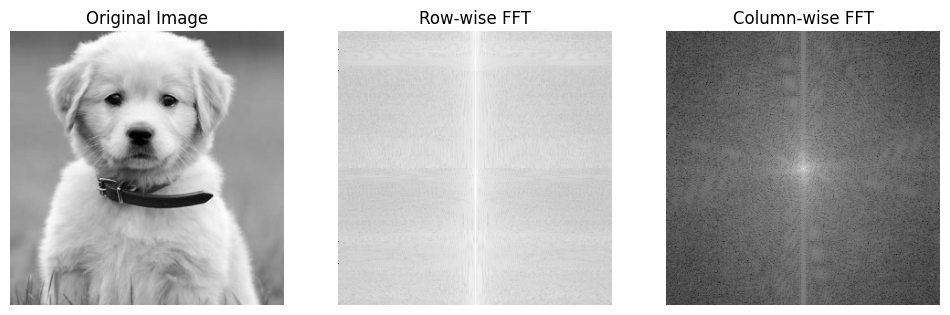

In [5]:
if __name__ == '__main__':

    # ex1
    # x = np.random.random(1024)
    # print(np.allclose(DFT_slow(x), np.fft.fft(x)))
  # ex2
    img = io_url.imread('https://img2.zergnet.com/2309662_300.jpg')
    gray_img = np.mean(img, -1)
    row_fft, row_col_fft = DFT_2D(gray_img)
    show_img(gray_img, row_fft, row_col_fft)